In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import joblib
from tkinter import *
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('D:\\TITO\\Documents\\BANGKIT\\capstone\\price_prediction\\data\\price.csv')

In [3]:
data.head()

,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
0,Bawal Hitam,36000,B,Farmed,Moderately sustainable,30000
1,Bawal Putih,72000,B,Farmed,Moderately sustainable,60000
2,Cakalang,30000,B,Farmed,Moderately sustainable,25000
3,Kakap Merah,66000,B,Farmed,Moderately sustainable,55000
4,Kembung,30000,B,Farmed,Moderately sustainable,25000


In [4]:
data.shape

(1000, 6)

In [5]:
data.isnull().sum()

Fish Species       0
Price              0
Grade              0
Catching Method    0
Sustainability     0
Actual Price       0
dtype: int64

In [6]:
data.describe()

,Price,Actual Price
count,1000.000000,1000.000000
mean,35555.479000,47964.664000
std,36934.953043,42335.285309
min,63.000000,63.000000
25%,14477.500000,25000.000000
50%,27968.500000,41543.500000
75%,45612.750000,60047.500000
max,403200.000000,280000.000000


In [7]:
sorted(data['Price'],reverse=True)

[403200,
 336000,
 336000,
 322560,
 280000,
 268800,
 268800,
 268800,
 224000,
 224000,
 215040,
 201600,
 179200,
 168000,
 168000,
 161280,
 140000,
 134400,
 134400,
 115200,
 113330,
 112000,
 112000,
 109906,
 101694,
 100800,
 100667,
 100539,
 98176,
 96000,
 96000,
 95466,
 92160,
 89600,
 89538,
 87465,
 86896,
 86795,
 86400,
 86400,
 85281,
 84574,
 84000,
 84000,
 84000,
 83680,
 82535,
 80640,
 80083,
 80000,
 79936,
 79917,
 79778,
 79644,
 79521,
 79200,
 78826,
 77922,
 76800,
 76800,
 76800,
 76537,
 76316,
 75739,
 75516,
 75468,
 75331,
 75138,
 74751,
 74087,
 73922,
 73893,
 73314,
 72894,
 72825,
 72695,
 72452,
 72187,
 72000,
 72000,
 72000,
 72000,
 71802,
 71672,
 71040,
 70885,
 70683,
 70032,
 70000,
 69968,
 69911,
 69333,
 69240,
 69180,
 69140,
 69120,
 69120,
 68909,
 68685,
 68628,
 68544,
 68187,
 68111,
 68088,
 67795,
 67694,
 67431,
 67200,
 67200,
 67200,
 67200,
 66936,
 66816,
 66702,
 66639,
 66278,
 66000,
 66000,
 65960,
 65774,
 65546,
 652

In [8]:
# data = data[~(data['Price']>=6000.0) & (data['Price']<=403200.0)]
# data.shape
# data.head()

# Data mapping humu humu~

In [9]:
data['Fish Species'].unique()
data['Fish Species'] = data['Fish Species'].map({'Bawal Hitam':0,'Bawal Putih':1,'Cakalang':2,
                                                 "Kakap Merah":3,"Kembung":4,"Kerapu":5,
                                                 "Kuwe":6,"Makerel":7,"Salmon":8,
                                                 "Tenggiri":9,"Tongkol":10})

In [10]:
data['Grade'].unique()
data['Grade'] = data['Grade'].map({'C':0,'B':1,'A':2})

In [11]:
data['Sustainability'].unique()
data['Sustainability'] =data['Sustainability'].map({'Moderately sustainable':1,'Unsustainable':0})


In [12]:
data['Catching Method'].unique()
data['Catching Method'] = data['Catching Method'].map({'Farmed':3,'Netting':2, 'Spearfishing':0, 'Fishing Hook':1})

# Data Normalization humu humu~

In [13]:
from sklearn.preprocessing import MinMaxScaler
import joblib

scaler = MinMaxScaler(feature_range=(0,1))
scaler2 = MinMaxScaler(feature_range=(0,1))
data['Actual Price'] = scaler.fit_transform(data[['Actual Price']])
data['Price'] = scaler2.fit_transform(data[['Price']])

In [14]:
joblib.dump(scaler, 'actual_price_scaler.pkl')
joblib.dump(scaler2, 'price_scaler.pkl')

['price_scaler.pkl']

In [15]:
data.head()

,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
0,0,0.089143,1,3,1,0.106942
1,1,0.178443,1,3,1,0.214109
2,2,0.074260,1,3,1,0.089081
3,3,0.163560,1,3,1,0.196248
4,4,0.074260,1,3,1,0.089081


In [16]:
print(scaler.inverse_transform(data[['Actual Price']]))

[[3.0000e+04]
 [6.0000e+04]
 [2.5000e+04]
 [5.5000e+04]
 [2.5000e+04]
 [8.0000e+04]
 [7.0000e+04]
 [3.0000e+04]
 [2.8000e+05]
 [6.0000e+04]
 [3.8000e+04]
 [3.0000e+04]
 [6.0000e+04]
 [2.5000e+04]
 [5.5000e+04]
 [2.5000e+04]
 [8.0000e+04]
 [7.0000e+04]
 [3.0000e+04]
 [2.8000e+05]
 [6.0000e+04]
 [3.8000e+04]
 [3.0000e+04]
 [6.0000e+04]
 [2.5000e+04]
 [5.5000e+04]
 [2.5000e+04]
 [8.0000e+04]
 [7.0000e+04]
 [3.0000e+04]
 [2.8000e+05]
 [6.0000e+04]
 [3.8000e+04]
 [3.0000e+04]
 [6.0000e+04]
 [2.5000e+04]
 [5.5000e+04]
 [2.5000e+04]
 [8.0000e+04]
 [7.0000e+04]
 [3.0000e+04]
 [2.8000e+05]
 [6.0000e+04]
 [3.8000e+04]
 [3.0000e+04]
 [6.0000e+04]
 [2.5000e+04]
 [5.5000e+04]
 [2.5000e+04]
 [8.0000e+04]
 [7.0000e+04]
 [3.0000e+04]
 [2.8000e+05]
 [6.0000e+04]
 [3.8000e+04]
 [3.0000e+04]
 [6.0000e+04]
 [2.5000e+04]
 [5.5000e+04]
 [2.5000e+04]
 [8.0000e+04]
 [7.0000e+04]
 [3.0000e+04]
 [2.8000e+05]
 [6.0000e+04]
 [3.8000e+04]
 [3.0000e+04]
 [6.0000e+04]
 [2.5000e+04]
 [5.5000e+04]
 [2.5000e+04]
 [8.00

In [17]:
data

,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
0,0,0.089143,1,3,1,0.106942
1,1,0.178443,1,3,1,0.214109
2,2,0.074260,1,3,1,0.089081
3,3,0.163560,1,3,1,0.196248
4,4,0.074260,1,3,1,0.089081
...,...,...,...,...,...,...
995,5,0.014397,1,0,0,0.043438
996,6,0.017103,1,0,0,0.051562
997,7,0.014119,1,0,0,0.042606
998,8,0.035779,1,0,0,0.107592


# Feature and label split humu humu~

In [18]:
X = data.drop(['Price', 'Fish Species'],axis=1)
y = data['Price']
print(X.head())
print(y.head())

   Grade  Catching Method  Sustainability  Actual Price
0      1                3               1      0.106942
1      1                3               1      0.214109
2      1                3               1      0.089081
3      1                3               1      0.196248
4      1                3               1      0.089081
0    0.089143
1    0.178443
2    0.074260
3    0.163560
4    0.074260
Name: Price, dtype: float64


# Train test split humu humu~

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
import tensorflow as tf

# Model 1 humu humu~

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=[4]),
    tf.keras.layers.Dense(1, activation='linear')
])

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='mean_squared_error', metrics=['mse'])

In [23]:
history = model.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 13ms/step - loss: 0.0334 - mse: 0.0334 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0019 - 

# Model 2 humu humu~

In [24]:
model_complex = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=[4]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [25]:
model_complex.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='mean_squared_error', metrics=['mse'])

In [26]:
history2 = model_complex.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=100)

Epoch 1/100


25/25 [==============================] - 1s 16ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 4.8491e-04 - val_mse: 4.8491e-04
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 6.5721e-04 - mse: 6.5721e-04 - val_loss: 3.4584e-04 - val_mse: 3.4584e-04
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 4.2715e-04 - mse: 4.2715e-04 - val_loss: 2.0929e-04 - val_mse: 2.0929e-04
Epoch 8/100
25/25 [==============================] - 0

# Model 3 humu humu~

In [27]:
model_that_she_not_worry_about = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=[4]),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Reshape((2, 10)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)),
    tf.keras.layers.Dense(1, activation='linear')
])

In [28]:
model_that_she_not_worry_about.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='mean_squared_error', metrics=['mse'])

In [29]:
history3 = model_that_she_not_worry_about.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=100)

Epoch 1/100
25/25 [==============================] - 6s 47ms/step - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 2/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 3/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 4/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 5/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 6/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 7/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 8/100
25/25 [==============================] - 0s 15ms/step - loss: 0.

# Model 4 humu humu~

In [30]:
model_using_huber = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=[4]),
    tf.keras.layers.Dense(25, activation='relu'),  # Add an additional dense layer to match the expected output shape
    tf.keras.layers.Reshape((5, 5)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)),
    tf.keras.layers.Dense(1)
])

In [31]:
model_using_huber.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss=tf.keras.losses.Huber(), metrics=['mse'])

In [32]:
history4 = model_using_huber.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=100)

Epoch 1/100
25/25 [==============================] - 3s 41ms/step - loss: 0.0042 - mse: 0.0084 - val_loss: 0.0027 - val_mse: 0.0054
Epoch 2/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0036 - mse: 0.0071 - val_loss: 0.0028 - val_mse: 0.0057
Epoch 3/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0033 - mse: 0.0065 - val_loss: 0.0026 - val_mse: 0.0052
Epoch 4/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0029 - mse: 0.0058 - val_loss: 0.0020 - val_mse: 0.0040
Epoch 5/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0025 - mse: 0.0050 - val_loss: 0.0016 - val_mse: 0.0033
Epoch 6/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0019 - mse: 0.0039 - val_loss: 0.0010 - val_mse: 0.0021
Epoch 7/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0013 - mse: 0.0026 - val_loss: 6.8549e-04 - val_mse: 0.0014
Epoch 8/100
25/25 [==============================] - 0s 14ms/step - loss

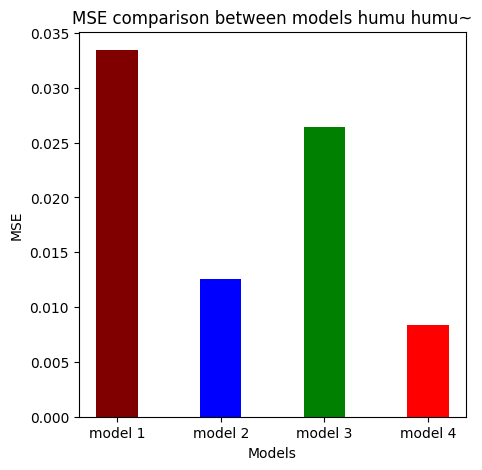

In [33]:
import numpy as np
import matplotlib.pyplot as plt 

fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.bar("model 1",history.history['mse'], color ='maroon', width = 0.4)
plt.bar("model 2",history2.history['mse'], color ='blue', width = 0.4)
plt.bar("model 3",history3.history['mse'], color ='green', width = 0.4)
plt.bar("model 4",history4.history['mse'], color ='red', width = 0.4)

plt.xlabel("Models")
plt.ylabel("MSE")
plt.title("MSE comparison between models humu humu~")
plt.show()


(0.0, 50.0)

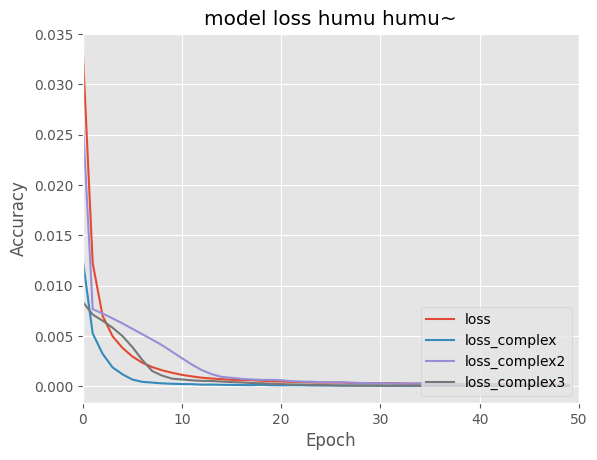

In [34]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.title('model loss humu humu~')
plt.plot(history.history['mse'][:50], label='loss')
plt.plot(history2.history['mse'][:50], label='loss_complex')
plt.plot(history3.history['mse'][:50], label='loss_complex2')
plt.plot(history4.history['mse'][:50], label='loss_complex3')


plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.xlim(0, 50)


In [35]:
y_pred1 = model.predict(X_test)
score1 = metrics.r2_score(y_test,y_pred1)
y_pred2 = model_complex.predict(X_test)
score2 = metrics.r2_score(y_test,y_pred2)
y_pred3 = model_that_she_not_worry_about.predict(X_test)
score3 = metrics.r2_score(y_test,y_pred3)
y_pred4 = model_using_huber.predict(X_test)
score4 = metrics.r2_score(y_test,y_pred4)
print('model1 : ',score1)
print('model2 : ',score2)
print('model3 : ',score3)
print('model4 : ',score4)

7/7 [==============================] - 1s 4ms/step
model1 :  0.9709152368972417
model2 :  0.982451817113864
model3 :  0.9835790011992489
model4 :  0.9814645333769099


In [36]:
print(X.shape)
print(y.shape)

(1000, 4)
(1000,)


In [37]:
arr = scaler.inverse_transform(data[['Actual Price']])
arr2 = []
for array in arr :
    arr2.append(array[0])
    
print(arr2)

[30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0,

In [38]:
arr_price = scaler2.inverse_transform(data[['Price']])
arr_price2 = []
for array in arr_price :
    arr_price2.append(array[0])
print(arr_price2)

[36000.0, 72000.0, 30000.0, 66000.0, 30000.0, 96000.0, 84000.0, 36000.0, 336000.0, 72000.0, 45600.0, 43200.0, 86400.0, 36000.0, 79200.0, 36000.0, 115200.0, 100800.0, 43200.0, 403200.0, 86400.0, 54720.00000000001, 18000.0, 36000.0, 15000.0, 33000.0, 15000.0, 48000.0, 42000.0, 18000.0, 168000.0, 36000.0, 22800.0, 30000.0, 60000.0, 25000.0, 55000.00000000001, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 36000.0, 72000.0, 30000.0, 66000.0, 30000.0, 96000.0, 84000.0, 36000.0, 336000.0, 72000.0, 45600.0, 15000.0, 30000.0, 12500.0, 27500.000000000004, 12500.0, 40000.0, 35000.0, 15000.0, 140000.0, 30000.0, 19000.0, 18000.0, 36000.0, 15000.0, 33000.0, 15000.0, 48000.0, 42000.0, 18000.0, 168000.0, 36000.0, 22800.0, 21600.0, 43200.0, 18000.0, 39600.0, 18000.0, 57600.0, 50400.0, 21600.0, 201600.0, 43200.0, 27360.000000000004, 9000.0, 18000.0, 7500.0, 16500.0, 7500.0, 24000.0, 21000.0, 9000.0, 84000.0, 18000.0, 11400.0, 24000.0, 48000.0, 20000.0, 44000.0, 20000.0, 64000.0, 56000.

32/32 [==============================] - 0s 4ms/step


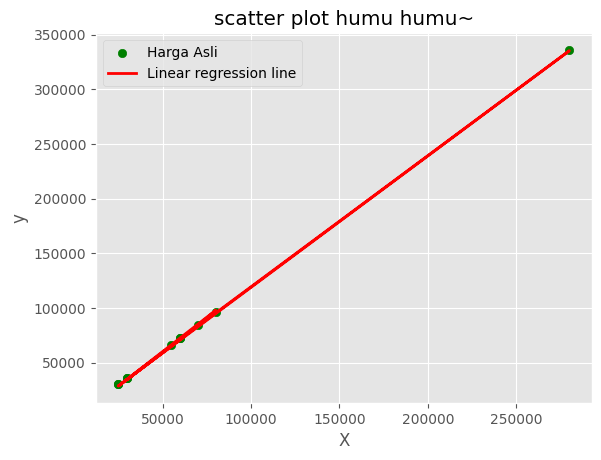

In [39]:
xt = X.T
y_pred_humu = model_using_huber.predict(X)
plt.scatter(arr2[:10], arr_price2[:10], color='green', label='Harga Asli')
plt.plot(arr2[:10], scaler2.inverse_transform(y_pred_humu[:10]), color='red', linewidth=2, label='Linear regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('scatter plot humu humu~')
plt.show()

In [40]:
# model.save('D:\\TITO\\Documents\\BANGKIT\\capstone\\bloomy_price_prediction\\bloomy-price-predictor\\price_predictor.h5')

In [54]:
model_complex.save('price_predictor_complex.h5')

In [53]:
model_that_she_not_worry_about.save('price_predictor_complex_lstm.h5')

In [52]:
model_using_huber.save('price_predictor_complex_lstm_huber.h5')

In [44]:
import numpy as np
import math

In [45]:
# Bulatkan ke kelipatan ribuan humu humu~
def bulatkan_ke_kelipatan(angka, kelipatan):
    ke_atas = kelipatan * ((angka + kelipatan - 1) // kelipatan)
    ke_bawah = kelipatan * (angka // kelipatan)

    if abs(angka - ke_atas) < abs(angka - ke_bawah):
        return ke_atas
    else:
        return ke_bawah

In [46]:
def predict_price(data, model):
    prediction = model.predict(data)
    prediction = scaler2.inverse_transform(prediction)
    prediction_float = prediction.item()
    rounded_value = bulatkan_ke_kelipatan(round(prediction_float, 0),1000)
    
    return rounded_value

In [48]:
# mapping sorted from 0 to 4 guide
# Grade = C,B,A
# Catching method = Spearfishing, Fishing Hook, Netting, Farmed
# Sustainability = Unsustainable, Moderately sustainable
data_new = pd.DataFrame({
    'Grade':2,
    'Catching Method':3,
    'Sustainability':1,
    'Actual Price' : 30000

},index=[0])

if data_new['Grade'].iloc[0] == 0 or data_new['Actual Price'].iloc[0] == 0:
    result_array = np.array([0])
    float_number = float(result_array[0])
    price = float_number
else:
    data_new['Actual Price'] = scaler.transform(data_new[['Actual Price']])
    # price1 = predict_price(data_new,model)
    price2 = predict_price(data_new,model_complex)
    price3 = predict_price(data_new,model_that_she_not_worry_about)
    price4 = predict_price(data_new,model_using_huber)
    average_price = bulatkan_ke_kelipatan((price2 + price3 + price4)/3, 1000)
    result_array = np.array([price2,price3, price4], dtype=int)
    
    
    
print(result_array)
print(average_price)

1/1 [==============================] - 0s 24ms/step
[43000 46000 43000]
44000.0
